In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from pathlib import Path
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import cmocean.cm as cmo

from pykml import parser
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from lxml import etree
from shapely.geometry import Polygon
import geopandas as gpd

from pykml import parser



lat_top=30
lat_bot=27
lon_left=-92
lon_rigth=-88.75

extent=[lon_left, lon_rigth, lat_bot, lat_top]

In [2]:
df = pd.read_csv('../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/stations.csv', sep=',', index_col=0)
df

,Lat,Lon
Name,,
St.11,28.212711,-89.571360
St.12,28.593656,-88.890999
St.13,28.518589,-89.610482
St.14,28.727365,-89.613951
St.15,28.946873,-88.846049
St.16,28.891849,-89.542663
St.2,28.897664,-89.597111
St.4,28.795941,-90.702223
St.5B,28.804316,-91.332270


In [3]:
stationswindandriver = pd.read_csv('../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/stationswindandriver.csv', sep=',', index_col=0)
stationswindandriver

,Lat,Lon
Name,,
EINL1,29.3731,-91.3839
PILL1,29.1792,-89.2589
USGS 07374525,29.8569,-89.9778
USGS 07381000,29.7977,-90.8225


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\548296061.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[0], lat[0]+.07, text[0],
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\548296061.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[1], lat[1]+.07, text[1],
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\548296061.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[2], lat[

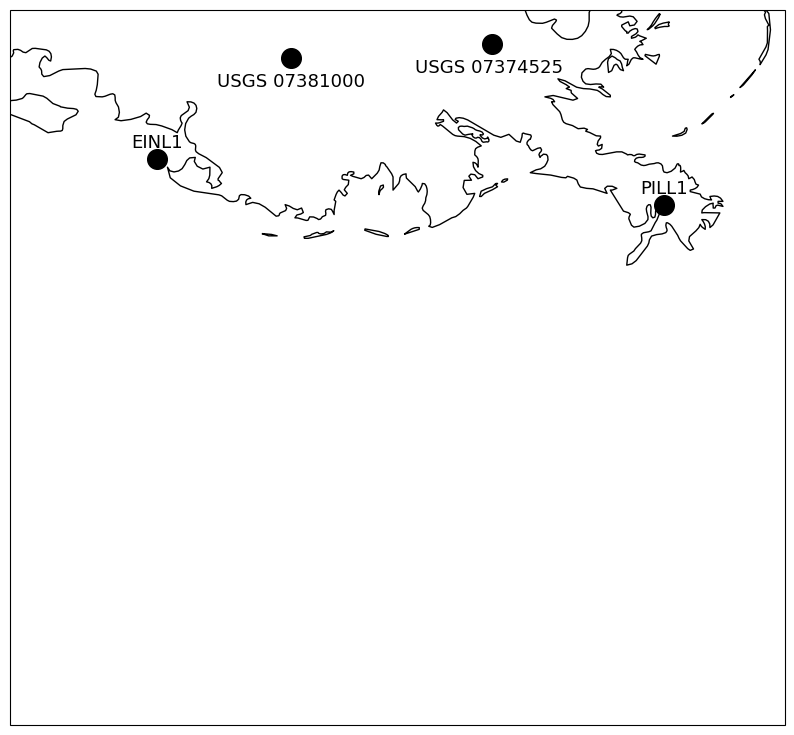

In [4]:
lat_top=30
lat_bot=28.7
lon_left=-92
lon_rigth=-87.9

# Generate text labels, longitude, and latitude
text = [x for x in stationswindandriver.index.ravel()]
lon = stationswindandriver['Lon']
lat = stationswindandriver['Lat']

# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
axes.add_feature(cfeature.COASTLINE)
axes.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent (make sure it covers your points)
axes.set_extent(extent, crs=ccrs.PlateCarree())

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='black',
                        edgecolor='black',
                        s=200,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
axes.text(lon[0], lat[0]+.07, text[0], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, transform=ccrs.PlateCarree())
axes.text(lon[1], lat[1]+.07, text[1], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, transform=ccrs.PlateCarree())
axes.text(lon[2], lat[2]-.1, text[2], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, transform=ccrs.PlateCarree())
axes.text(lon[3], lat[3]-.1, text[3], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, transform=ccrs.PlateCarree())

# Customize the plot
plt.title('')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot

# Show the plot
plt.show()


In [6]:
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon

# Load and parse the KML file
file_path = "../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_DS_Polygon.kml"  # Replace with your KML file path
tree = ET.parse(file_path)
root = tree.getroot()

# Namespace (KML uses namespaces, adjust if different)
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Extract coordinates
coordinates_text = root.find(".//kml:coordinates", namespace).text.strip()

# Process coordinates into a list of tuples
coordinates = [
    tuple(map(float, coord.split(',')))
    for coord in coordinates_text.split()
]

# Create a polygon (ignoring altitude)
polygon = Polygon([(lon, lat) for lon, lat, *alt in coordinates])

# Check the polygon validity
if polygon.is_valid:
    print("Polygon is valid.")
else:
    print("Polygon is invalid.")

# Save or process the polygon further
print(polygon)


Polygon is valid.
POLYGON ((-89.2684657019014 28.8655805438947, -89.2078698964593 28.7410963105985, -89.2110859347205 28.7366680583901, -89.2141272780536 28.730234447493, -89.2150630760023 28.7249705840319, -89.2177534951047 28.7183030236477, -89.2184553435662 28.7124542864686, -89.2207948384378 28.7088280694176, -89.2245380302324 28.7035642059564, -89.2302697926679 28.6910479083932, -89.2345978581805 28.6840294237782, -89.2382240752315 28.6747884190353, -89.2423181912569 28.6688227071126, -89.2458274335643 28.6604005255747, -89.2513252465126 28.6557215358315, -89.2585776806147 28.6488200259602, -89.2692397569947 28.6368414872792, -89.2735504477932 28.6316247386536, -89.2774106143314 28.6295191932692, -89.2841951494591 28.6205121380134, -89.2907457350997 28.6160670977573, -89.2999867398427 28.6086976889116, -89.3051336285603 28.6023810527582, -89.3156613554826 28.5918533258358, -89.3203403452259 28.5917363510922, -89.3258089144883 28.5870866050349, -89.3286163083343 28.5844254296184, -

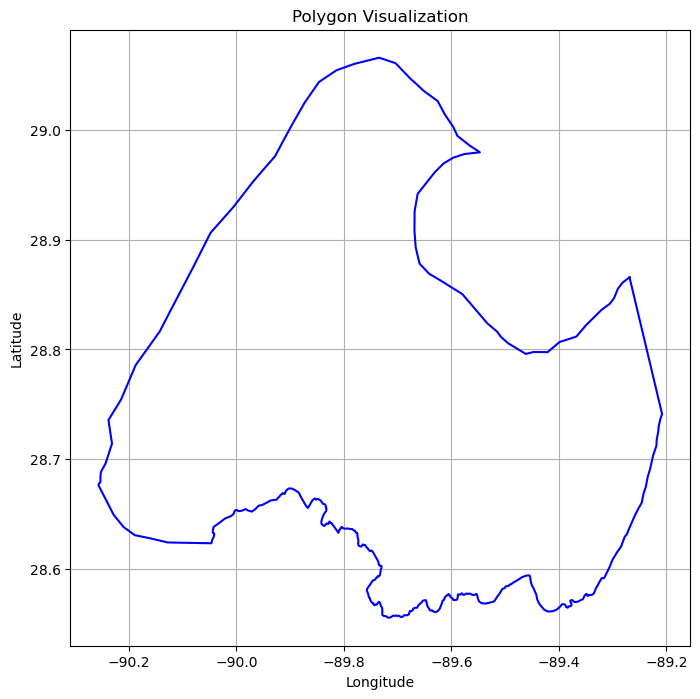

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# Plot the polygon using matplotlib
x, y = polygon.exterior.xy
plt.figure(figsize=(8, 8))
plt.plot(x, y, color="blue")
plt.title("Polygon Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


Number of polygons extracted: 1


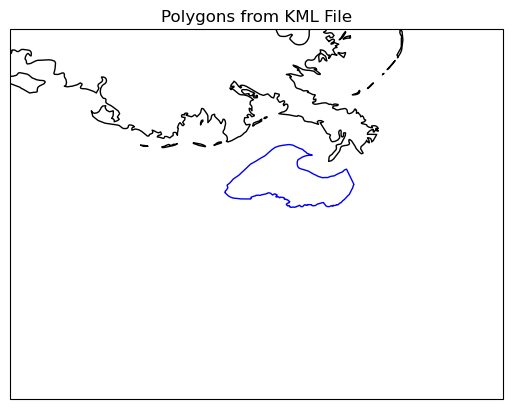

Polygons exported to polygons.geojson


In [8]:
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# File path to KML
file_path = "../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_DS_Polygon.kml"

# Parse the KML file
tree = ET.parse(file_path)
root = tree.getroot()

# Namespace for KML
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Extract coordinates (assumes one Polygon in the KML file)
polygons = []
for placemark in root.findall(".//kml:Placemark", namespace):
    # Locate the Polygon's coordinates
    coordinates_text = placemark.find(".//kml:coordinates", namespace)
    if coordinates_text is not None:
        # Process coordinates into a list of tuples
        coordinates = [
            tuple(map(float, coord.split(',')[:2]))  # Extract lon, lat only
            for coord in coordinates_text.text.strip().split()
        ]
        # Create a Shapely Polygon and validate
        polygon = Polygon(coordinates)
        if polygon.is_valid:
            polygons.append(polygon)
        else:
            print("Invalid polygon detected and skipped.")

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:4326")  # WGS84 CRS

# Check number of polygons extracted
print(f"Number of polygons extracted: {len(polygons)}")

# Plot polygons with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot polygons
if not gdf.empty:
    for polygon in gdf.geometry:
        ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
else:
    print("No polygons to plot.")

# Set extent for the region (optional)
ax.set_extent([-92, -88, 27, 30], crs=ccrs.PlateCarree())

# Customize and show plot
plt.title('Polygons from KML File')
plt.savefig('polygons_map.png')
plt.show()

# Export to GeoJSON (optional)
if not gdf.empty:
    gdf.to_file("polygons.geojson", driver="GeoJSON")
    print("Polygons exported to polygons.geojson")
else:
    print("No polygons to export.")


Number of polygons extracted: 4


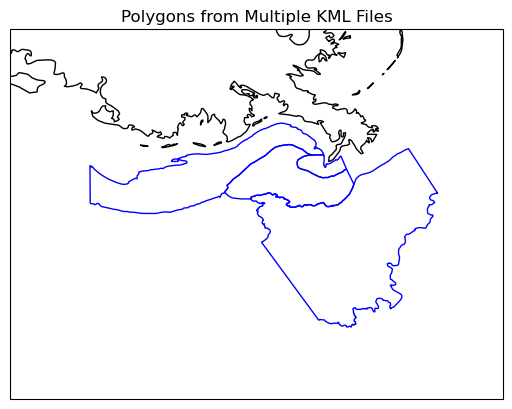

Polygons exported to polygons_multiple_files.geojson


In [9]:
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of KML files to process
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_HS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_PS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_DS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_SLP_Polygon.kml'
]

# List to hold polygons from all files
all_polygons = []

# Namespace for KML
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Process each KML file
for file_path in kml_files:
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract polygons from the current file
    for placemark in root.findall(".//kml:Placemark", namespace):
        coordinates_text = placemark.find(".//kml:coordinates", namespace)
        if coordinates_text is not None:
            # Process coordinates into a list of tuples (lon, lat)
            coordinates = [
                tuple(map(float, coord.split(',')[:2]))  # Only lon, lat (ignoring altitude)
                for coord in coordinates_text.text.strip().split()
            ]
            # Create a Shapely Polygon and check if it's valid
            polygon = Polygon(coordinates)
            if polygon.is_valid:
                all_polygons.append(polygon)
            else:
                print(f"Invalid polygon detected in file: {file_path} and skipped.")

# Create a GeoDataFrame from all polygons
gdf = gpd.GeoDataFrame(geometry=all_polygons, crs="EPSG:4326")  # WGS84 CRS

# Check the number of polygons extracted
print(f"Number of polygons extracted: {len(all_polygons)}")

# Plot polygons with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot polygons
if not gdf.empty:
    for polygon in gdf.geometry:
        ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
else:
    print("No polygons to plot.")

# Set extent for the region (optional)
ax.set_extent([-92, -88, 27, 30], crs=ccrs.PlateCarree())

# Customize and show plot
plt.title('Polygons from Multiple KML Files')
plt.show()

# Export to GeoJSON (optional)
if not gdf.empty:
    gdf.to_file("polygons_multiple_files.geojson", driver="GeoJSON")
    print("Polygons exported to polygons_multiple_files.geojson")
else:
    print("No polygons to export.")


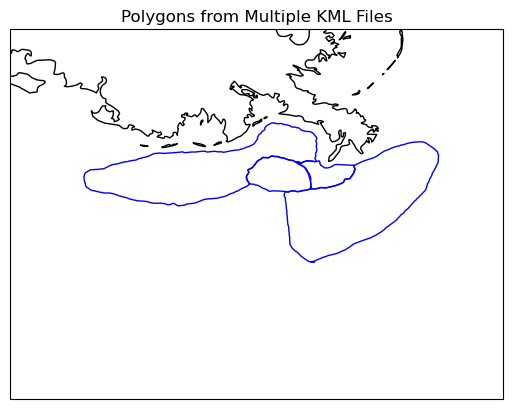

In [10]:
from pykml import parser
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of KML file paths
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/HS.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/PS.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/DS.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/S.kml'
]

# Function to extract polygons from a KML file
def extract_polygons(kml_file):
    try:
        with open(kml_file, 'rb') as file:
            doc = file.read()
        kml_doc = parser.fromstring(doc)
        polygons = []
        for placemark in kml_doc.Document.Placemark:
            geom_text = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
            coords = [tuple(map(float, p.split(',')[:2])) for p in geom_text.split()]
            polygon = Polygon(coords)
            polygons.append(polygon)
        return gpd.GeoDataFrame(geometry=polygons)
    except FileNotFoundError:
        print(f"File not found: {kml_file}")
        return None

# List to hold GeoDataFrames from each KML file
gdfs = []

# Process each KML file
for kml_file in kml_files:
    gdf = extract_polygons(kml_file)
    if gdf is not None:
        gdfs.append(gdf)

# Check if any data was loaded
if gdfs:
    # Combine all GeoDataFrames into a single GeoDataFrame (optional)
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Plotting all polygons with Cartopy
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add natural Earth features for context
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot polygons if there are any
    if not combined_gdf.empty:
        for polygon in combined_gdf.geometry:
            ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
    else:
        print("No polygons to plot.")

    # Set extent (optional)
    ax.set_extent([-92, -88, 27, 30], crs=ccrs.PlateCarree())

    # Customize the plot
    plt.title('Polygons from Multiple KML Files')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('multi_kml_polygons_map.png')

    # Show the plot
    plt.show()
else:
    print("No valid data found.")


<GeoAxes: >

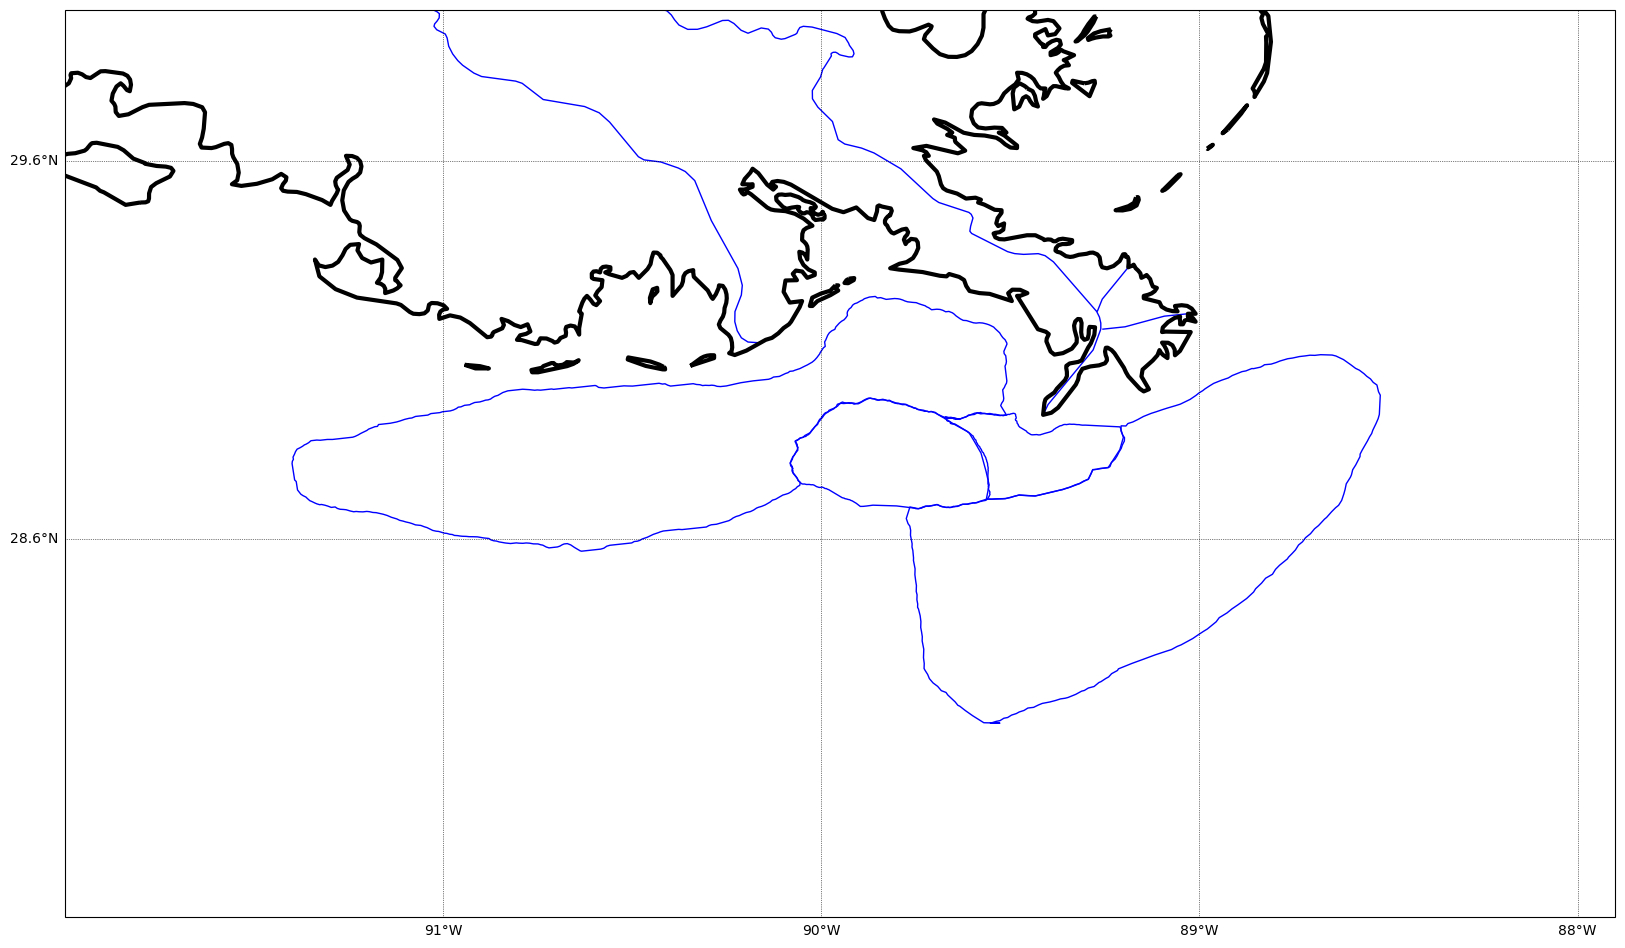

In [33]:
lat_top=30
lat_bot=27.6
lon_left=-92
lon_rigth=-87.9

extent=[lon_left, lon_rigth, lat_bot, lat_top]

res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='white', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    ax.add_feature(cfeature.COASTLINE, linewidth=3)
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
for polygon in combined_gdf.geometry:
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
plot_mapbase(extent, ax=axes)

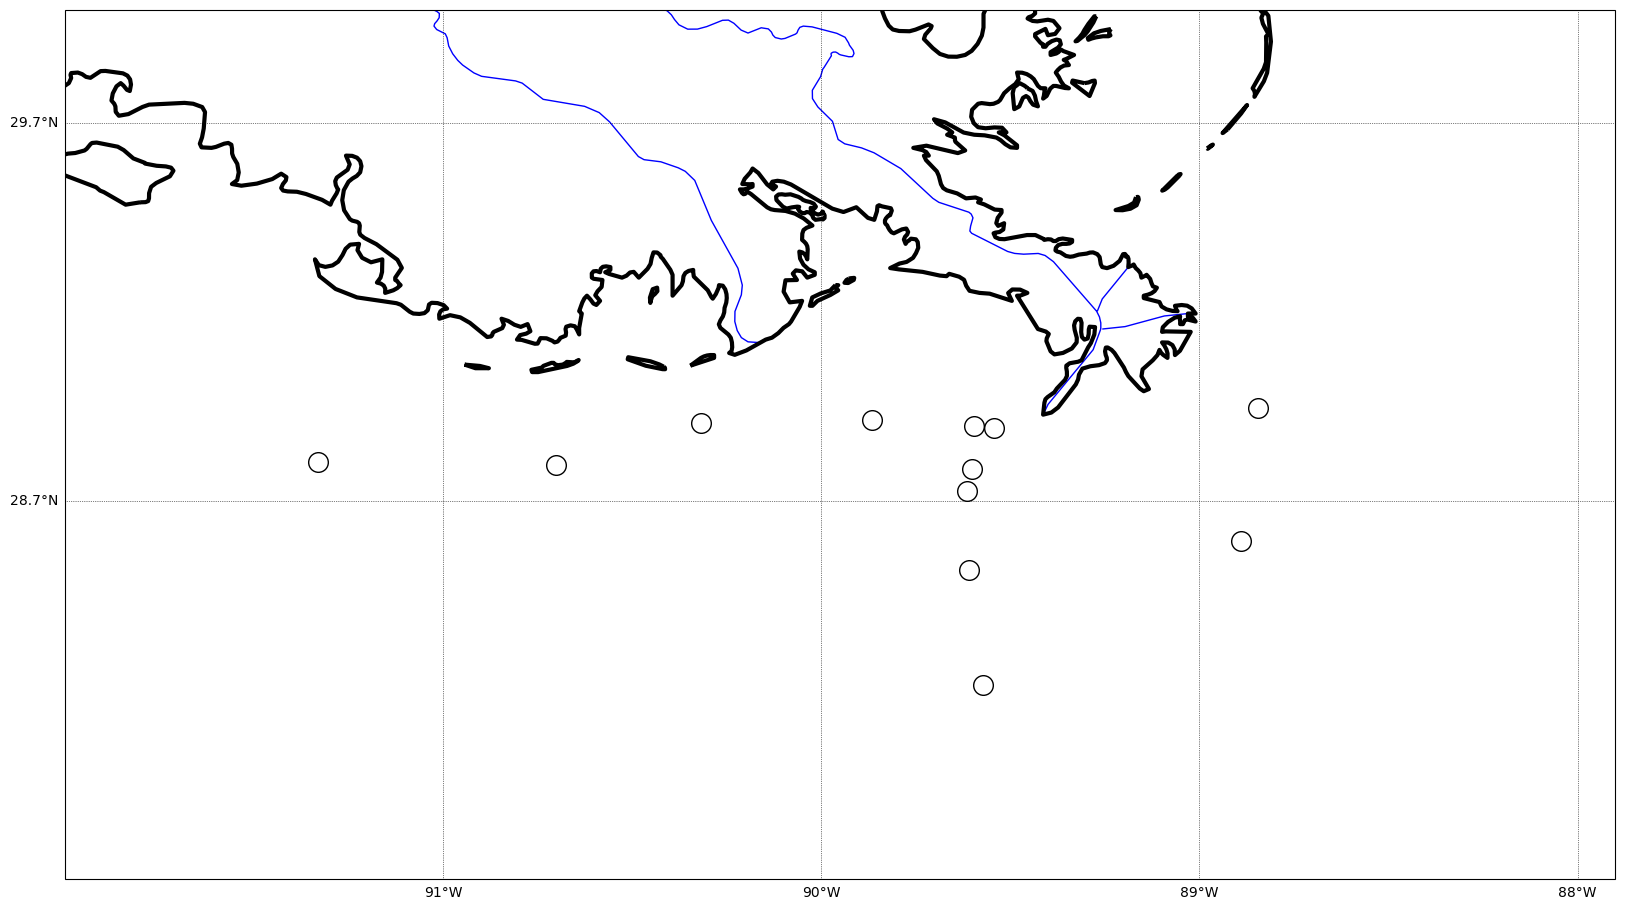

In [13]:
lat_top=30
lat_bot=27.7
lon_left=-92
lon_rigth=-87.9

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)
mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='k',
                                   s=200,
                                   transform=ccrs.PlateCarree())


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\331377094.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,


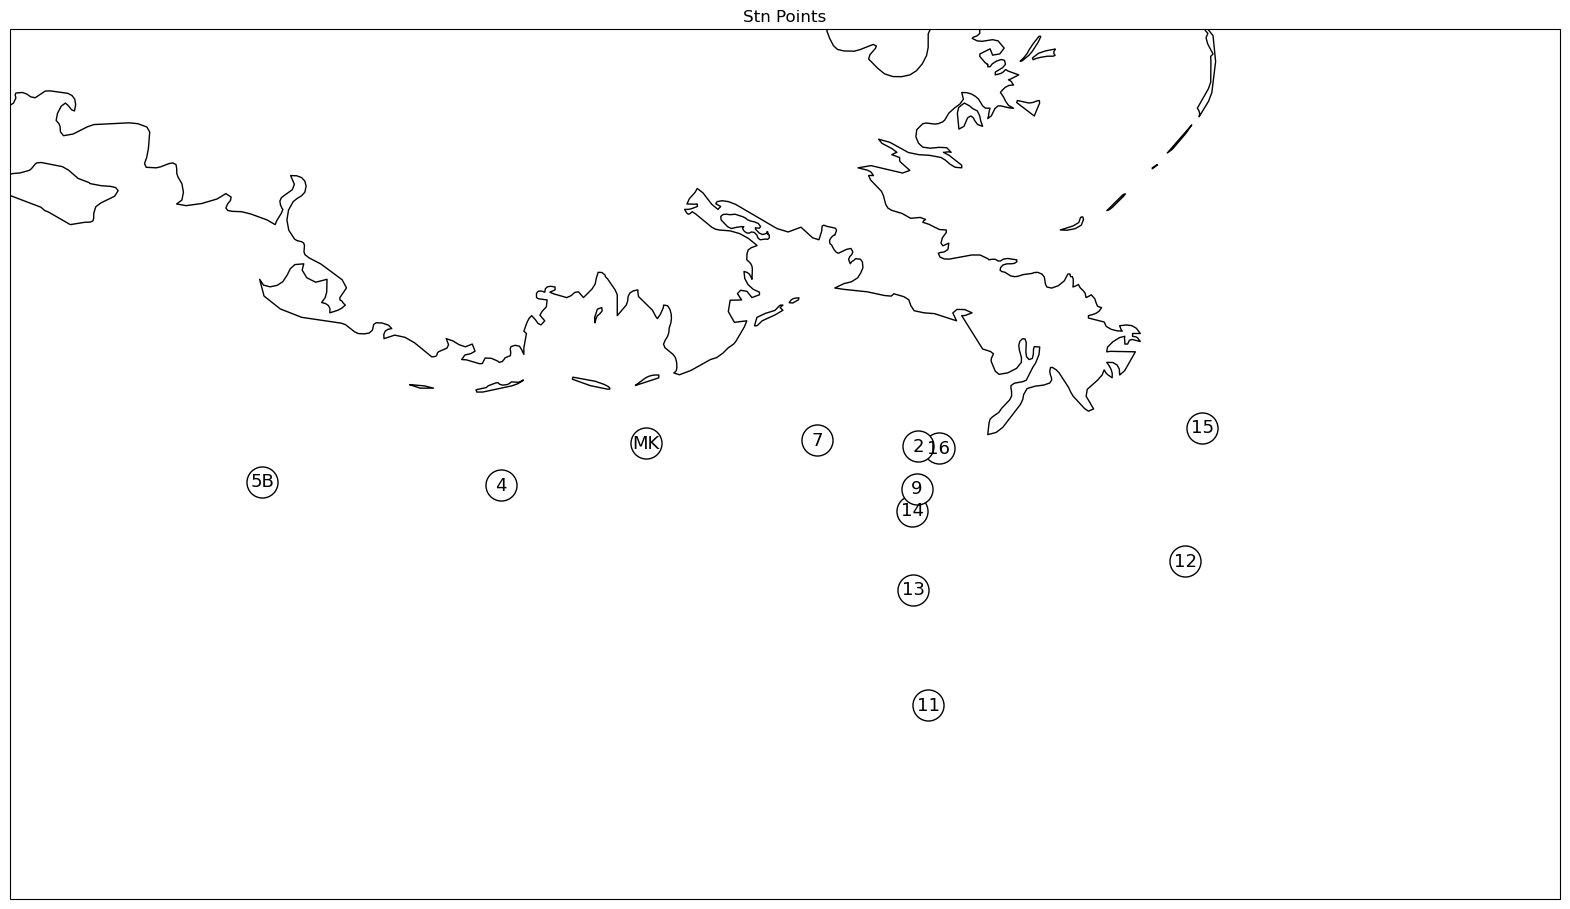

In [14]:
lat_top=30
lat_bot=27.7
lon_left=-92
lon_rigth=-88

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']

# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
axes.add_feature(cfeature.COASTLINE)
axes.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent (make sure it covers your points)
axes.set_extent(extent, crs=ccrs.PlateCarree())

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='black',
                        s=500,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=13, transform=ccrs.PlateCarree(), zorder=3)

# Customize the plot
plt.title('Stn Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot

# Show the plot
plt.show()


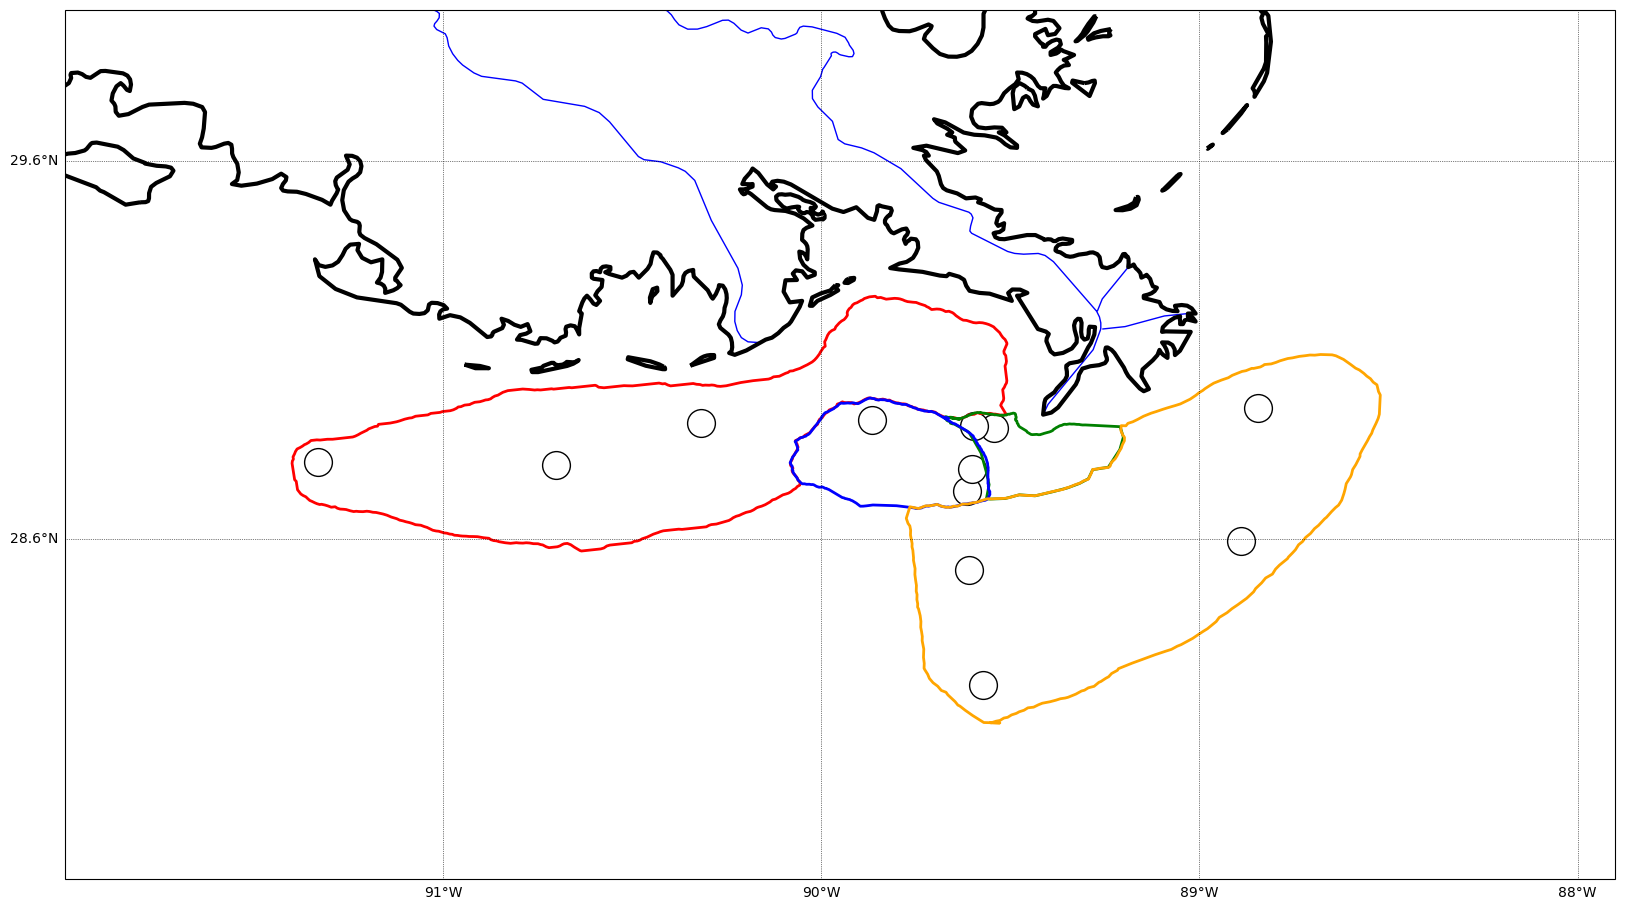

In [25]:
lat_top=30
lat_bot=27.6
lon_left=-92
lon_rigth=-87.9

colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here



fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)
mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='k',
                                   s=400,
                                   transform=ccrs.PlateCarree())


for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i], linewidth = 2)

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\610172058.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], text[i],


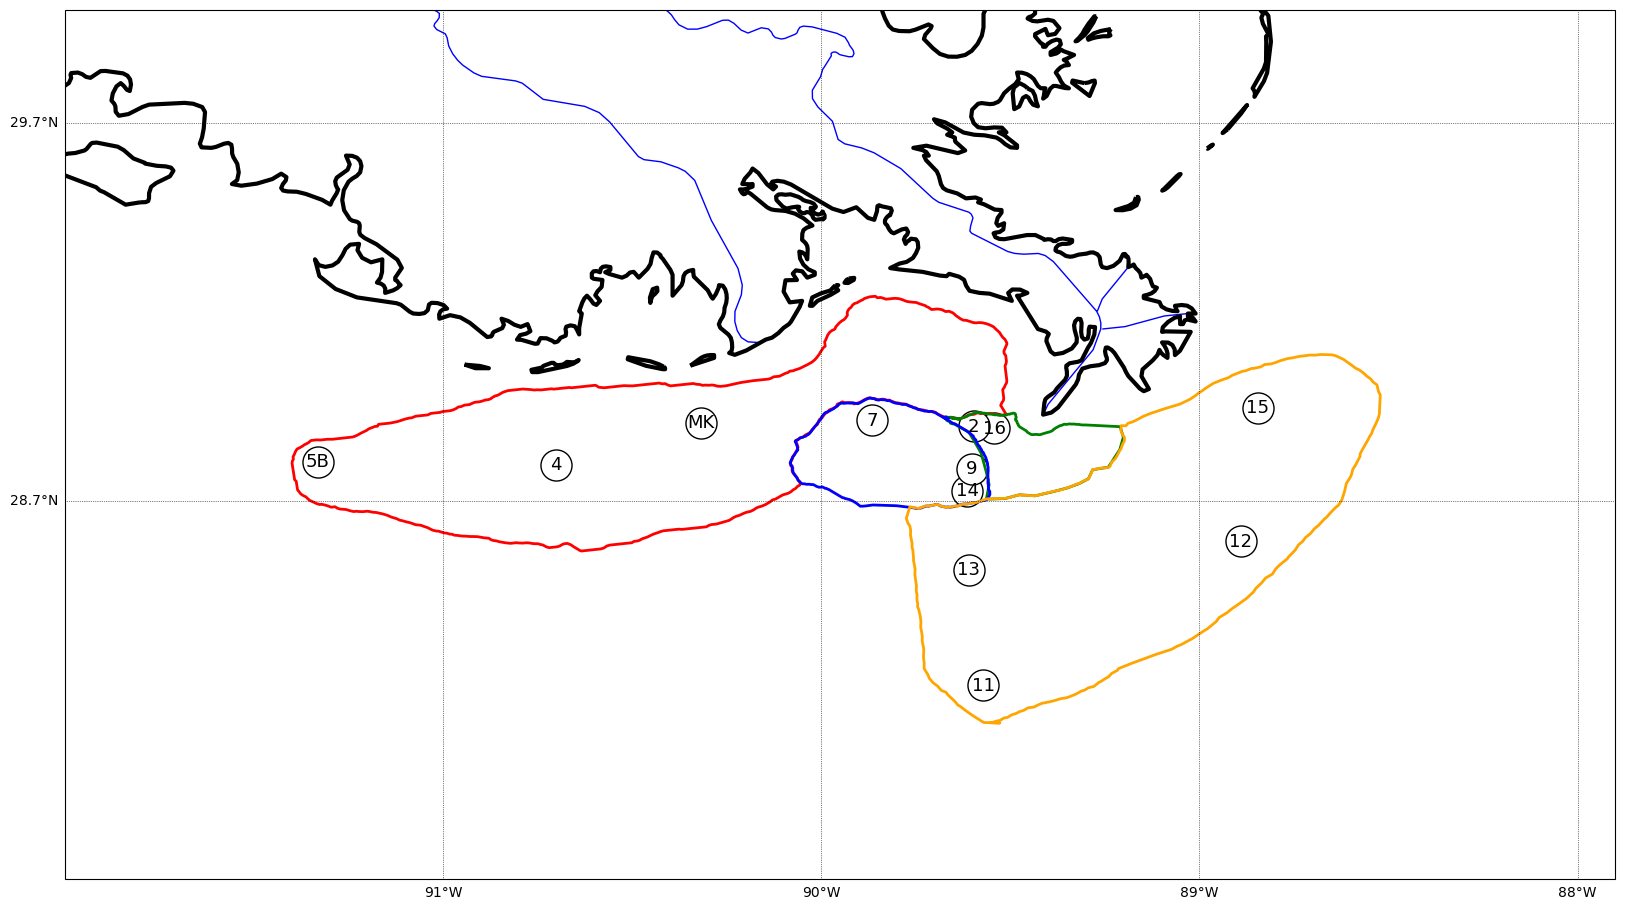

In [16]:
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)

for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i], linewidth = 2)

mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='black',
                                   s=500,
                                   transform=ccrs.PlateCarree())
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], text[i], 
             verticalalignment='center', horizontalalignment='center',
             fontsize=13)

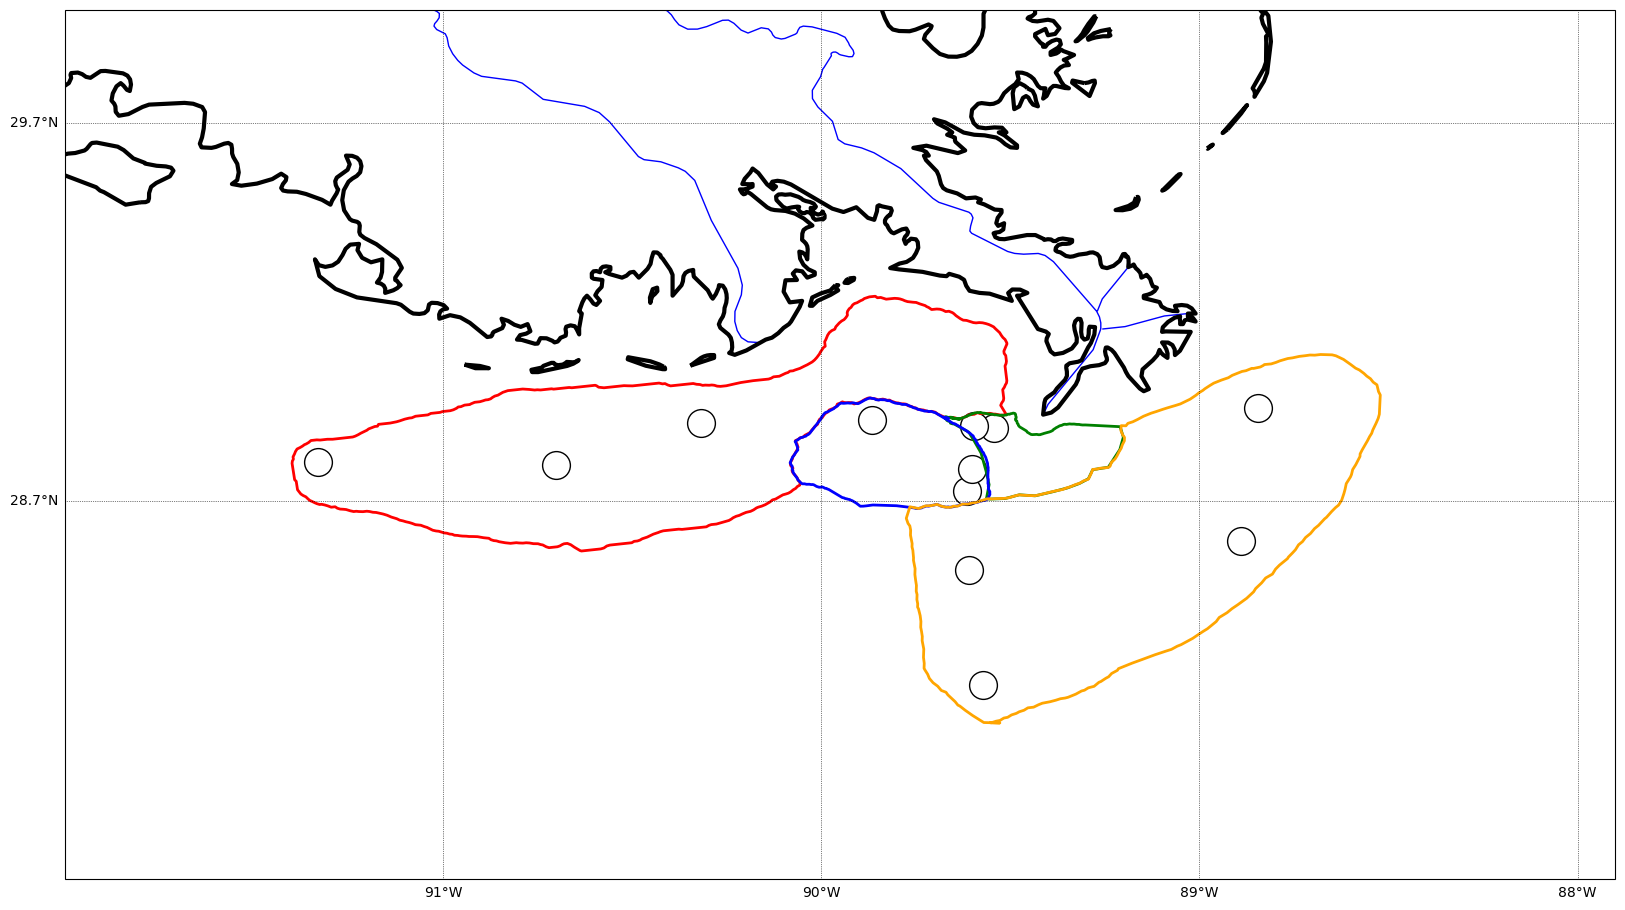

In [17]:
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here



fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)
mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='k',
                                   s=400,
                                   transform=ccrs.PlateCarree())

for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i], linewidth = 2)

<GeoAxes: >

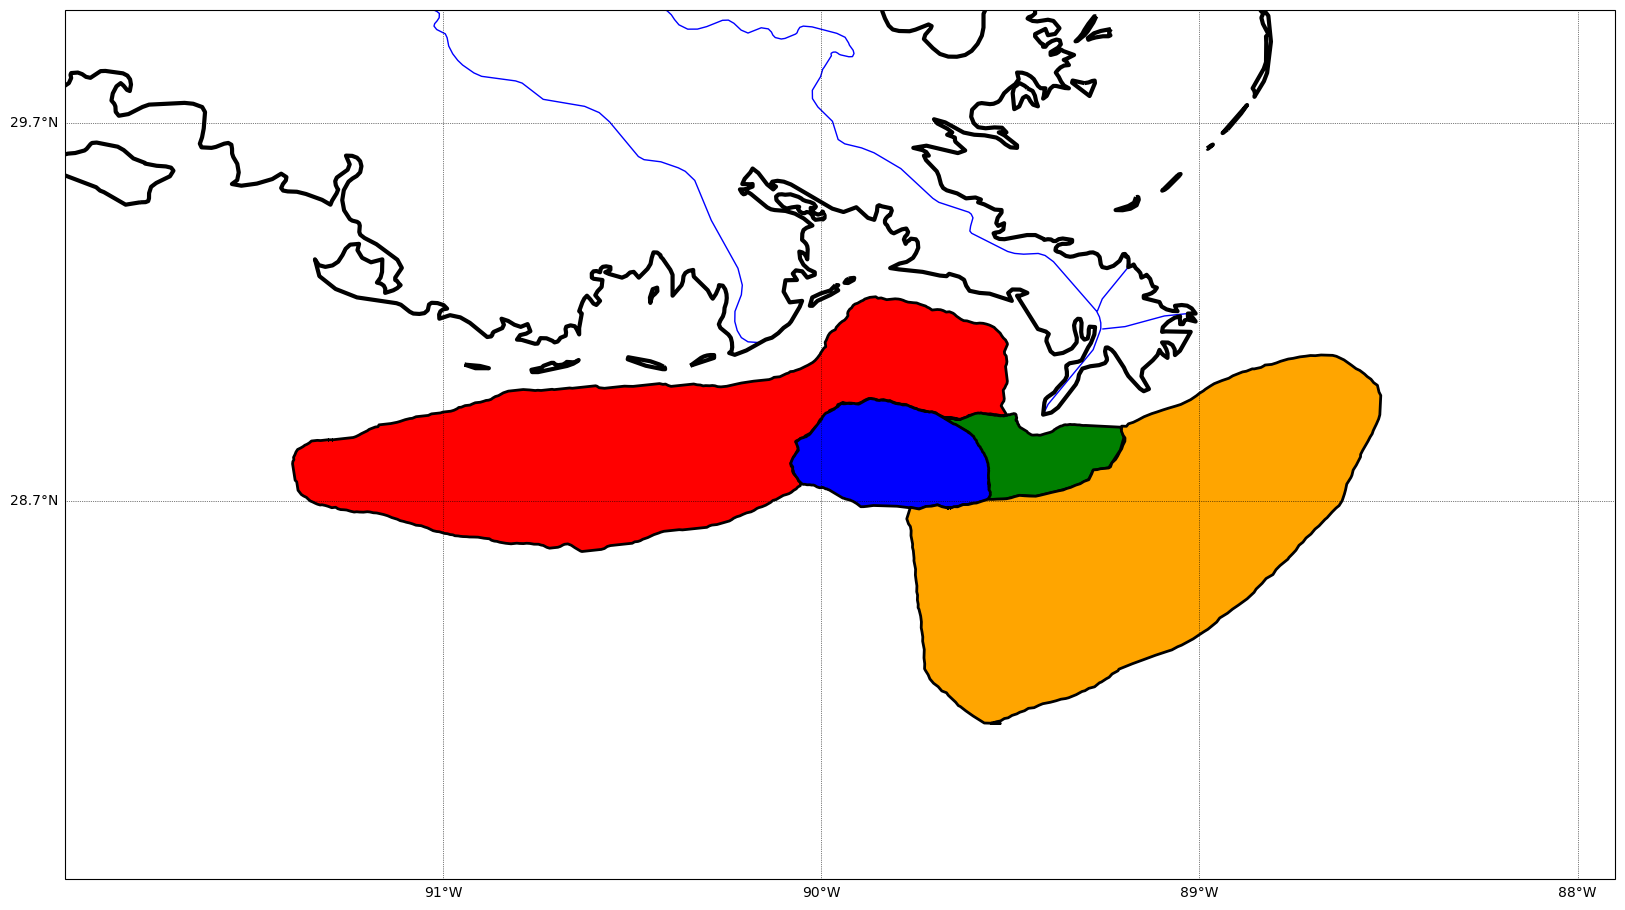

In [18]:
# Generate a list of unique colors for each polygon
num_polygons = len(combined_gdf)
colors = plt.cm.viridis_r(range(num_polygons))
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here


# Plotting all polygons with Cartopy
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i], edgecolor='black', linewidth=2)
plot_mapbase(extent, ax=axes)


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\435769717.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,


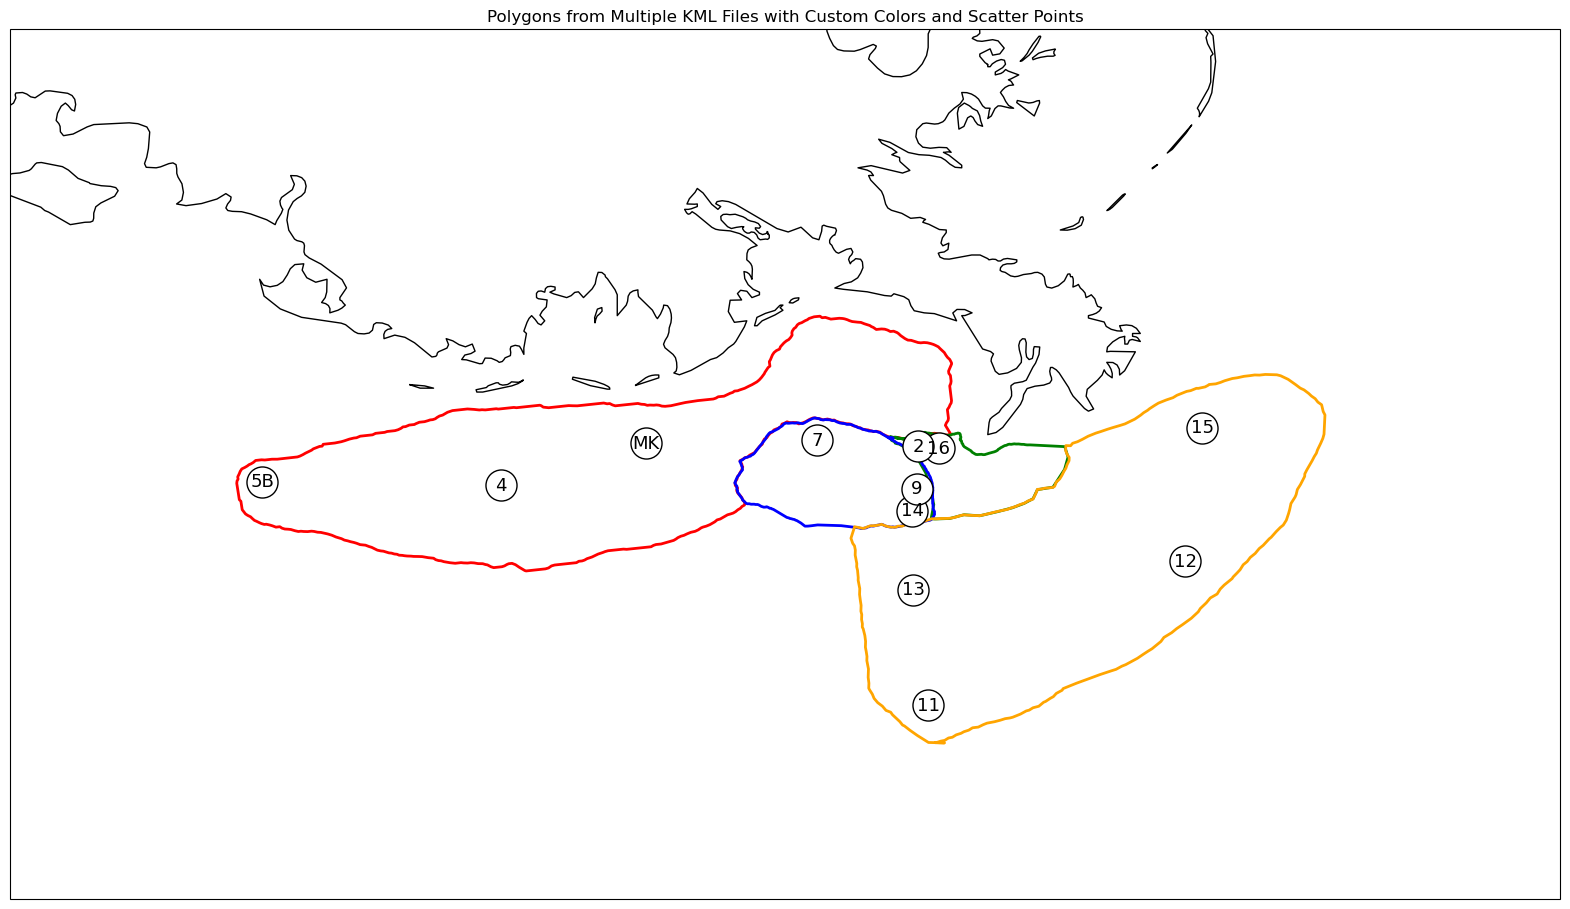

In [19]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']

# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
axes.add_feature(cfeature.COASTLINE)
axes.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent (make sure it covers your points)
axes.set_extent(extent, crs=ccrs.PlateCarree())

# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i % len(colors)], linewidth=2, zorder=1)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='black',
                        s=500,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=13, transform=ccrs.PlateCarree(), zorder=3)

# Customize the plot
plt.title('Polygons from Multiple KML Files with Custom Colors and Scatter Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot

# Show the plot
plt.show()



In [ ]:
# the plot below works good. 
# you are trying to make the colors the colors of CMO deep 
# then you can costum change up the lables for the points 
# then you can add regon lables. 

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\1344578680.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,


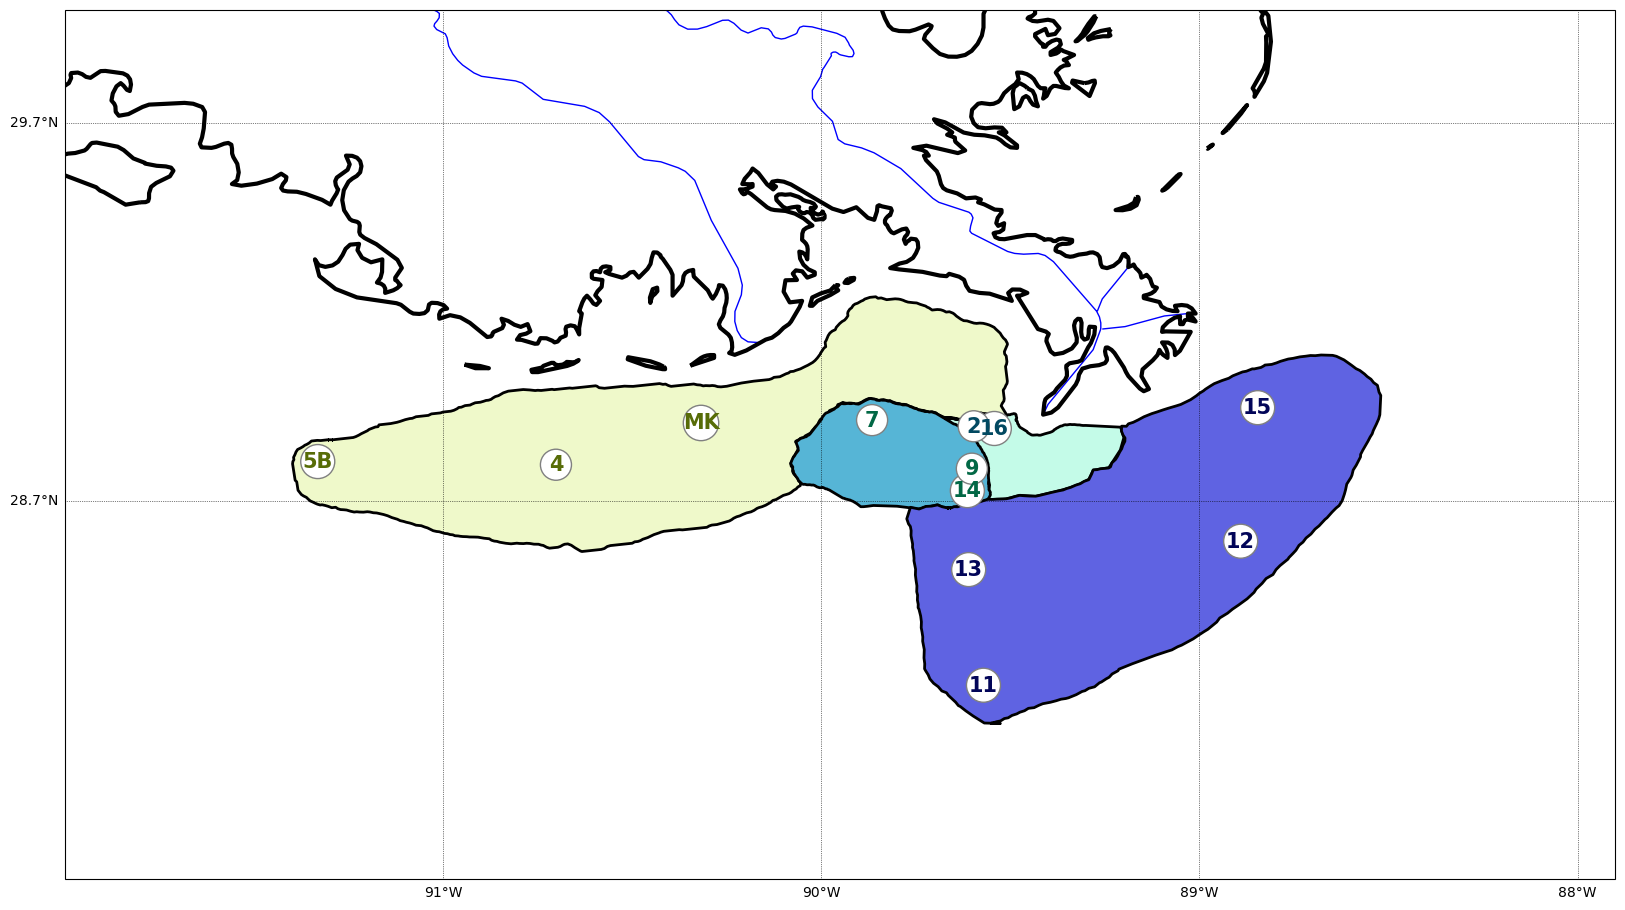

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']



# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)


# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                        edgecolor='black', linewidth=2,
                        zorder=1)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='grey',
                        s=ss,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=15, transform=ccrs.PlateCarree(), fontweight='bold', 
              color=txt_color[i],
              zorder=3)

# Save the plot
plt.savefig('../Dissertation_projects/Figures/multi_kml_polygons_map_custom_colored_with_points.png')

# Show the plot
plt.show()



C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\3545487733.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\3545487733.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon2[0], lat2[0]+.07, text2[0],
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\3545487733.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon2[1], lat2[

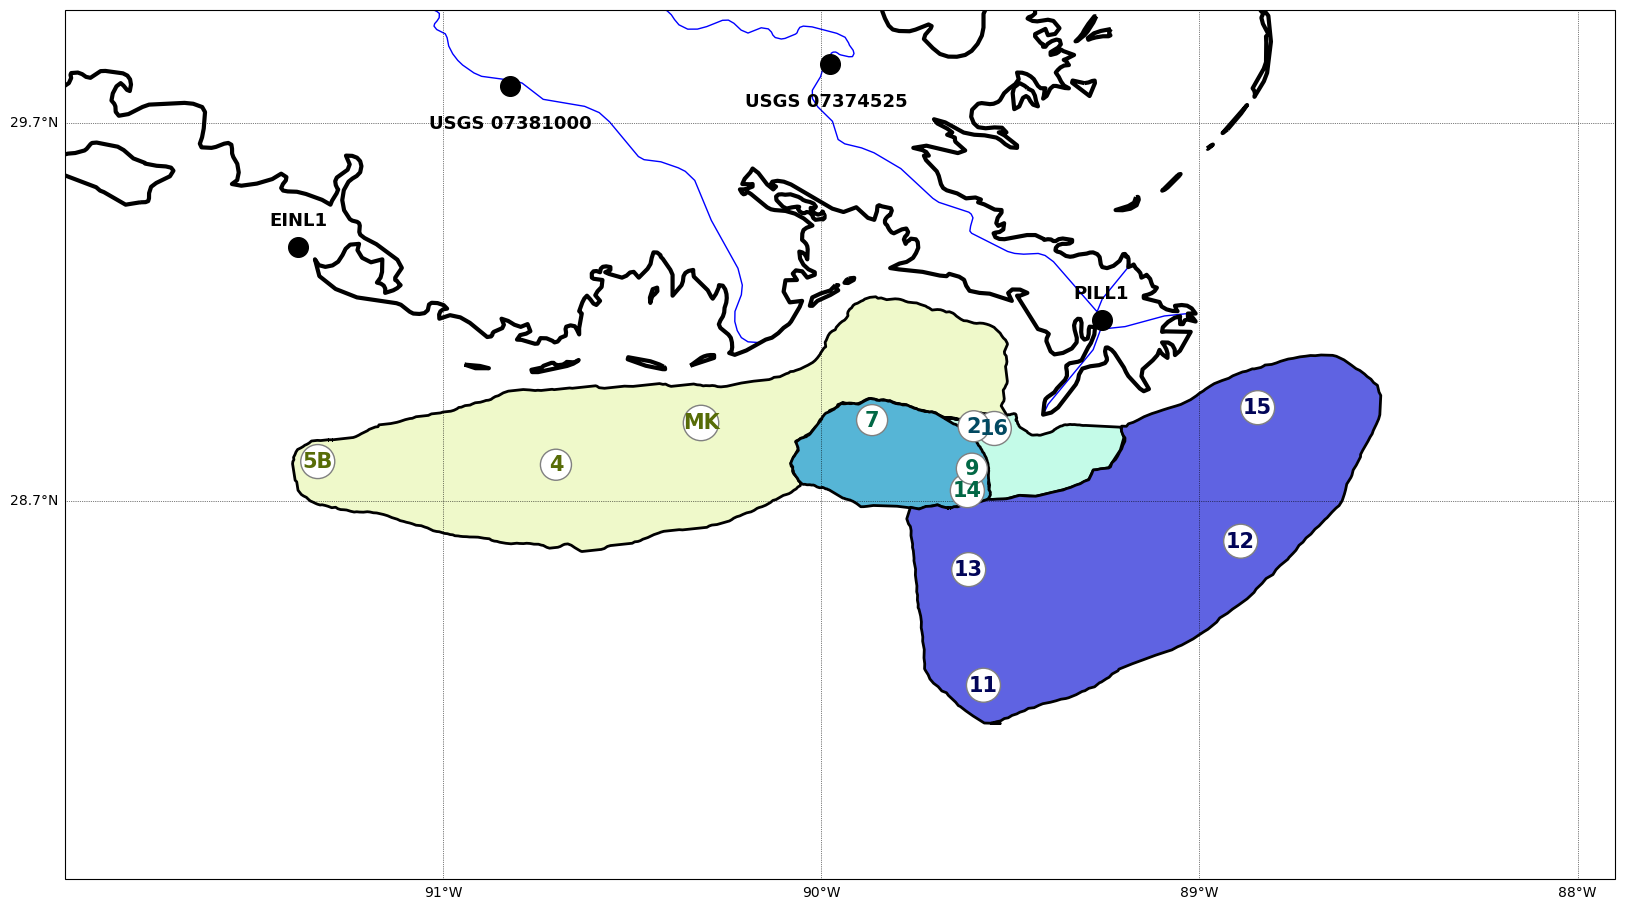

In [21]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']

# Generate text labels, longitude, and latitude
text2 = [x for x in stationswindandriver.index.ravel()]
lon2 = stationswindandriver['Lon']
lat2 = stationswindandriver['Lat']


# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)


# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                        edgecolor='black', linewidth=2,
                        zorder=1)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='grey',
                        s=ss,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=15, transform=ccrs.PlateCarree(), fontweight='bold', 
              color=txt_color[i],
              zorder=3)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon2, lat2,
                        c='black',
                        edgecolor='black',
                        s=200,
                        transform=ccrs.PlateCarree(),
                        zorder=4)

# Plot text labels on top of the points, also with a high zorder
axes.text(lon2[0], lat2[0]+.07, text2[0], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())
axes.text(lon2[1], lat2[1]+.07, text2[1], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())
axes.text(lon2[2], lat2[2]-.1, text2[2], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())
axes.text(lon2[3], lat2[3]-.1, text2[3], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())

# Save the plot
plt.savefig('../Dissertation_projects/Figures/Station_maps/multi_kml_polygons_map_custom_colored_with_points_and_wind_river_stns.png')

# Show the plot
plt.show()



Number of polygons extracted: 4


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\3068437402.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\3068437402.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon2[0], lat2[0]+.07, text2[0],
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7884\3068437402.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon2[1], lat

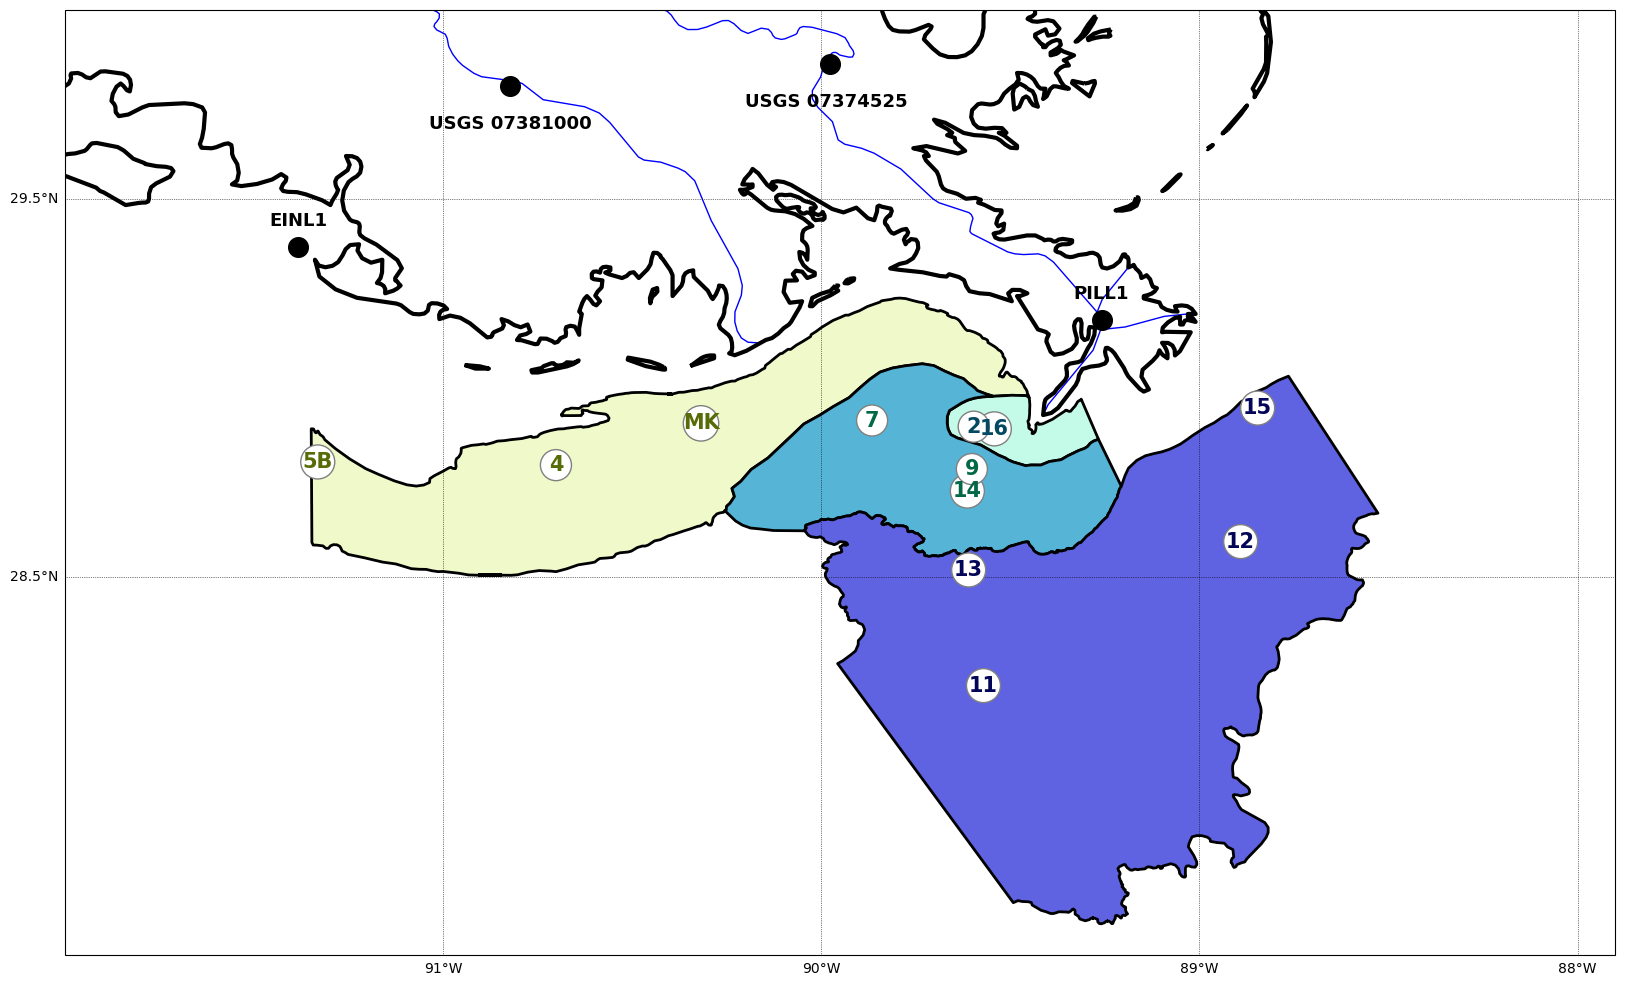

Polygons exported to polygons_multiple_files.geojson


In [35]:
lat_top=30
lat_bot=27.5
lon_left=-92
lon_rigth=-87.9

extent=[lon_left, lon_rigth, lat_bot, lat_top]


# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']

# Generate text labels, longitude, and latitude
text2 = [x for x in stationswindandriver.index.ravel()]
lon2 = stationswindandriver['Lon']
lat2 = stationswindandriver['Lat']


# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)


# List of KML files to process
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_HS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_PS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_DS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_SLP_Polygon.kml'
]

# List to hold polygons from all files
all_polygons = []

# Namespace for KML
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Process each KML file
for file_path in kml_files:
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract polygons from the current file
    for placemark in root.findall(".//kml:Placemark", namespace):
        coordinates_text = placemark.find(".//kml:coordinates", namespace)
        if coordinates_text is not None:
            # Process coordinates into a list of tuples (lon, lat)
            coordinates = [
                tuple(map(float, coord.split(',')[:2]))  # Only lon, lat (ignoring altitude)
                for coord in coordinates_text.text.strip().split()
            ]
            # Create a Shapely Polygon and check if it's valid
            polygon = Polygon(coordinates)
            if polygon.is_valid:
                all_polygons.append(polygon)
            else:
                print(f"Invalid polygon detected in file: {file_path} and skipped.")

# Create a GeoDataFrame from all polygons
gdf = gpd.GeoDataFrame(geometry=all_polygons, crs="EPSG:4326")  # WGS84 CRS

# Check the number of polygons extracted
print(f"Number of polygons extracted: {len(all_polygons)}")

# Plot polygons
if not gdf.empty:
    for i, polygon in enumerate(gdf.geometry):
    #for i, polygon in gdf.geometry:
        axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                            edgecolor='black', linewidth=2, zorder=1)
else:
    print("No polygons to plot.")

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='grey',
                        s=ss,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=15, transform=ccrs.PlateCarree(), fontweight='bold', 
              color=txt_color[i],
              zorder=3)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon2, lat2,
                        c='black',
                        edgecolor='black',
                        s=200,
                        transform=ccrs.PlateCarree(),
                        zorder=4)

# Plot text labels on top of the points, also with a high zorder
axes.text(lon2[0], lat2[0]+.07, text2[0], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())
axes.text(lon2[1], lat2[1]+.07, text2[1], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())
axes.text(lon2[2], lat2[2]-.1, text2[2], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())
axes.text(lon2[3], lat2[3]-.1, text2[3], 
          verticalalignment='center', horizontalalignment='center',
          fontsize=13, fontweight='bold', transform=ccrs.PlateCarree())

# Save the plot
plt.savefig('../Dissertation_projects/Figures/Station_maps/multi_kml_polygons_map_custom_colored_with_points_and_wind_river_stns.png')

# Show the plot
plt.show()


# Export to GeoJSON (optional)
if not gdf.empty:
    gdf.to_file("polygons_multiple_files.geojson", driver="GeoJSON")
    print("Polygons exported to polygons_multiple_files.geojson")
else:
    print("No polygons to export.")


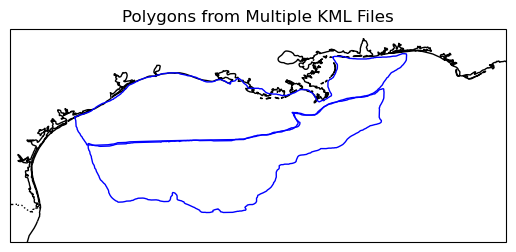

In [36]:
from pykml import parser
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of KML file paths
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/GOM_shelf.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/GOM_slope.kml'
]

# Function to extract polygons from a KML file
def extract_polygons(kml_file):
    try:
        with open(kml_file, 'rb') as file:
            doc = file.read()
        kml_doc = parser.fromstring(doc)
        polygons = []
        for placemark in kml_doc.Document.Placemark:
            geom_text = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
            coords = [tuple(map(float, p.split(',')[:2])) for p in geom_text.split()]
            polygon = Polygon(coords)
            polygons.append(polygon)
        return gpd.GeoDataFrame(geometry=polygons)
    except FileNotFoundError:
        print(f"File not found: {kml_file}")
        return None

# List to hold GeoDataFrames from each KML file
gdfs = []

# Process each KML file
for kml_file in kml_files:
    gdf = extract_polygons(kml_file)
    if gdf is not None:
        gdfs.append(gdf)

# Check if any data was loaded
if gdfs:
    # Combine all GeoDataFrames into a single GeoDataFrame (optional)
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Plotting all polygons with Cartopy
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add natural Earth features for context
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot polygons if there are any
    if not combined_gdf.empty:
        for polygon in combined_gdf.geometry:
            ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
    else:
        print("No polygons to plot.")

    # Set extent (optional)
    ax.set_extent([-98, -84, 25, 31], crs=ccrs.PlateCarree())

    # Customize the plot
    plt.title('Polygons from Multiple KML Files')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('multi_kml_polygons_map.png')

    # Show the plot
    plt.show()
else:
    print("No valid data found.")

<GeoAxes: >

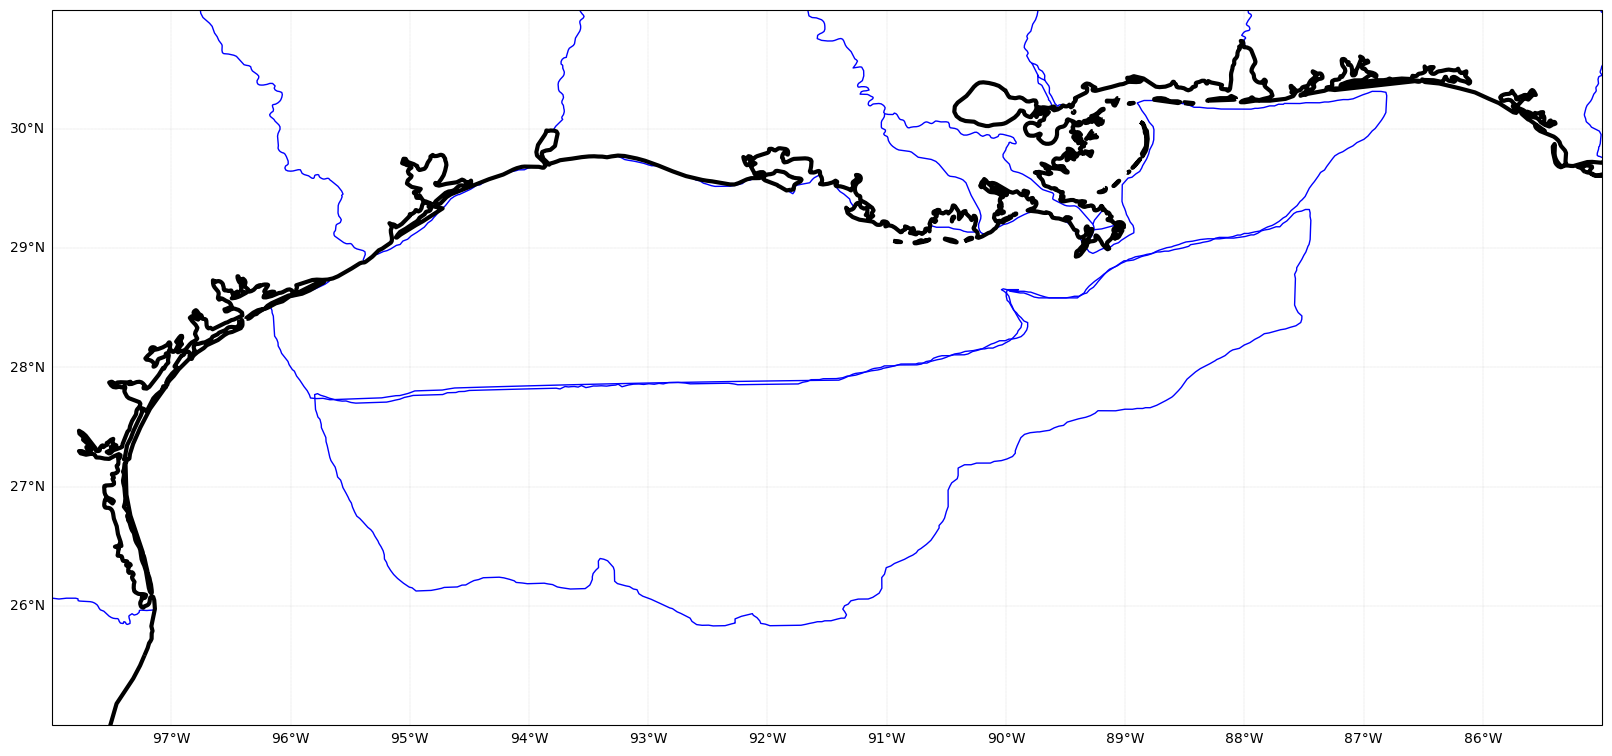

In [37]:
lat_top=31
lat_bot=25
lon_left=-98
lon_rigth=-85

extent=[lon_left, lon_rigth, lat_bot, lat_top]

res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='white', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    ax.add_feature(cfeature.COASTLINE, linewidth=3)
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.1, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
for polygon in combined_gdf.geometry:
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
plot_mapbase(extent, ax=axes)

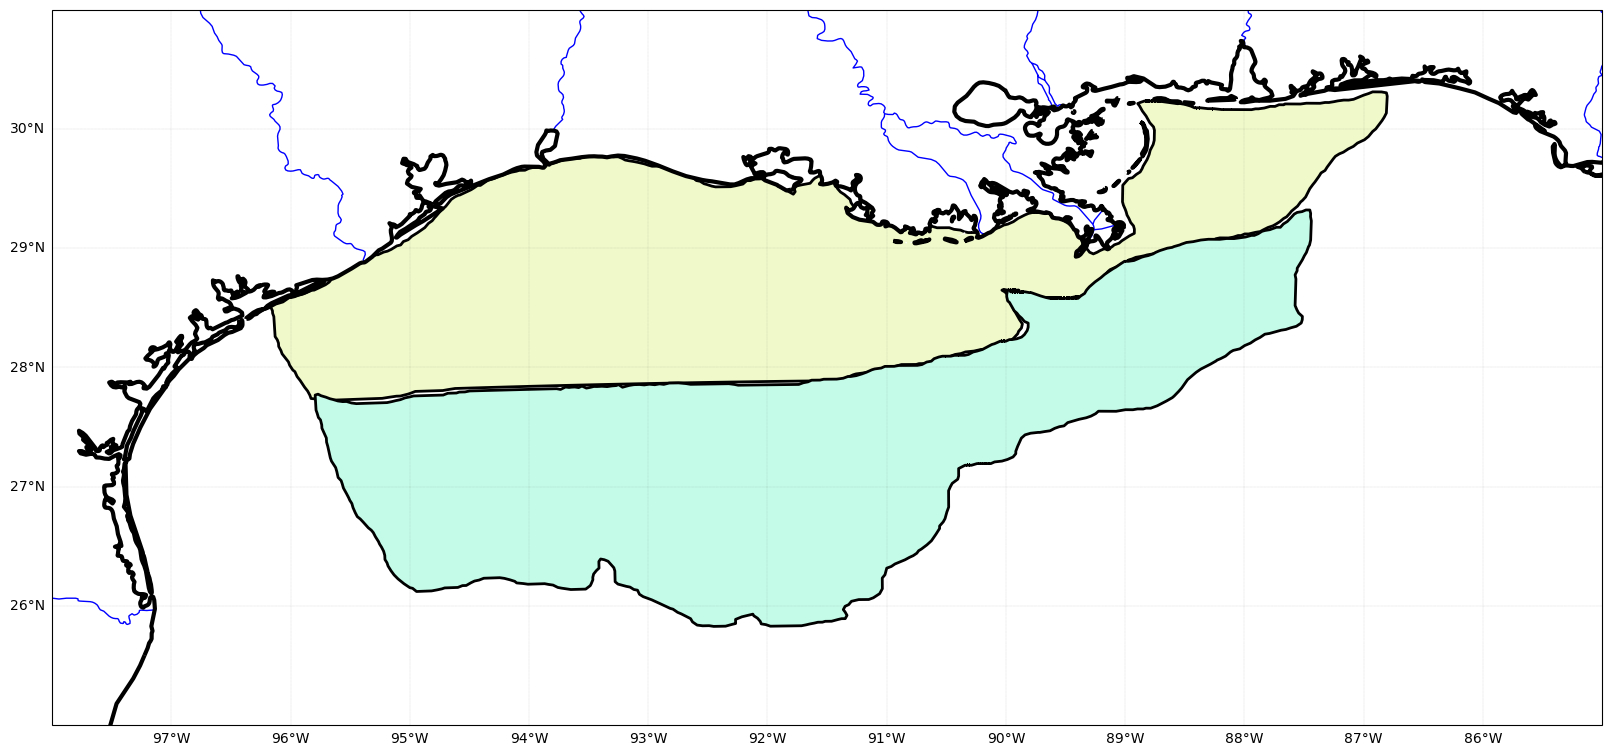

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']



# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)

# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                        edgecolor='black', linewidth=2,
                        zorder=1)


# Save the plot
plt.savefig('../Dissertation_projects/Figures/big_multi_kml_polygons_map_custom_colored_with_points.png')

# Show the plot
plt.show()

Number of polygons extracted: 4


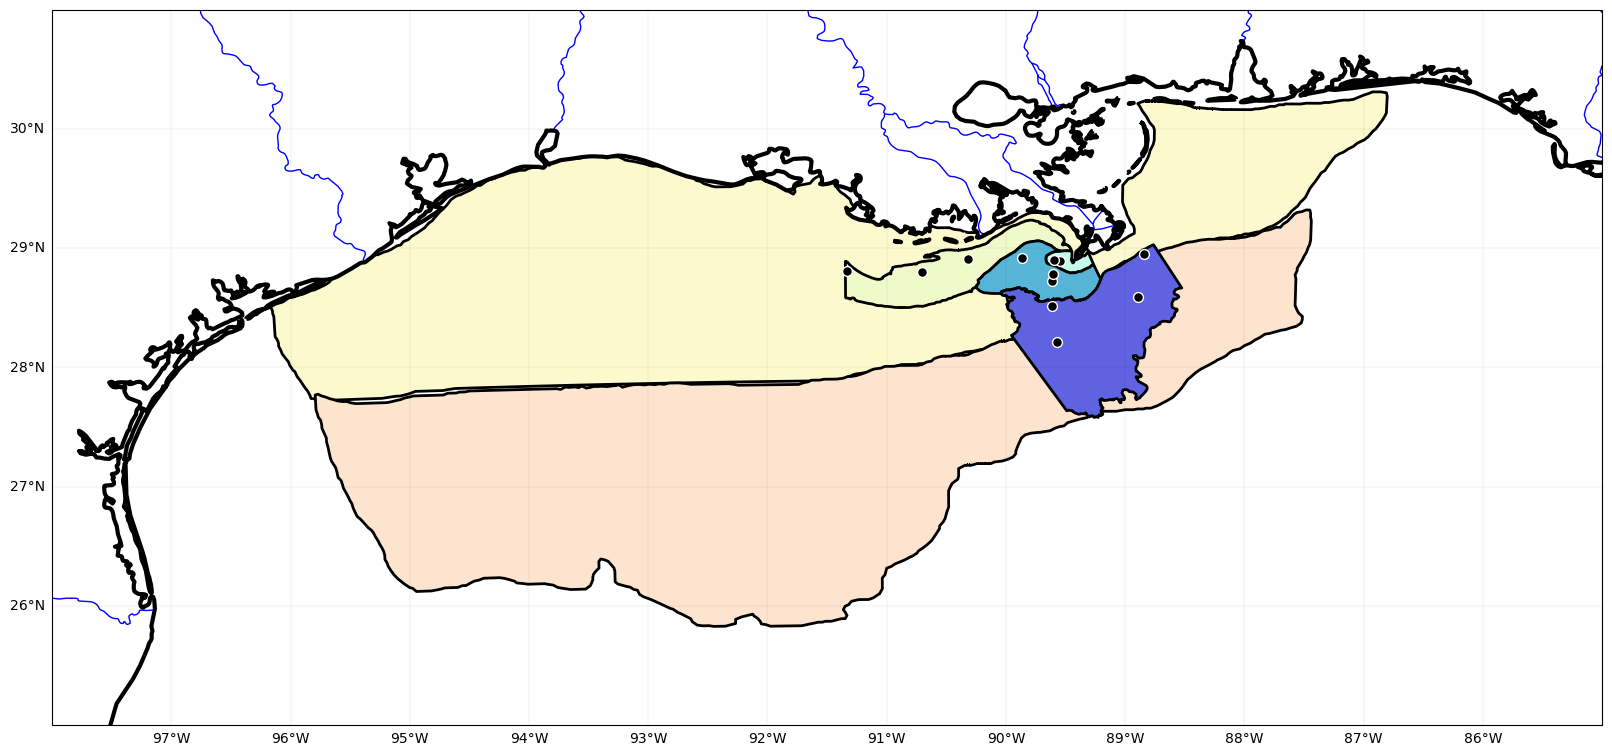

In [41]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['#fcf9ce', '#fce4ce']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']



# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)

# List of KML file paths
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/GOM_shelf.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/GOM_slope.kml'
]

# Function to extract polygons from a KML file
def extract_polygons(kml_file):
    try:
        with open(kml_file, 'rb') as file:
            doc = file.read()
        kml_doc = parser.fromstring(doc)
        polygons = []
        for placemark in kml_doc.Document.Placemark:
            geom_text = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
            coords = [tuple(map(float, p.split(',')[:2])) for p in geom_text.split()]
            polygon = Polygon(coords)
            polygons.append(polygon)
        return gpd.GeoDataFrame(geometry=polygons)
    except FileNotFoundError:
        print(f"File not found: {kml_file}")
        return None

# List to hold GeoDataFrames from each KML file
gdfs = []

# Process each KML file
for kml_file in kml_files:
    gdf = extract_polygons(kml_file)
    if gdf is not None:
        gdfs.append(gdf)

combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                        edgecolor='black', linewidth=2,
                        zorder=1)

# List of KML files to process
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_HS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_PS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_DS_Polygon.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/KML_SLP_Polygon.kml'
]

# List to hold polygons from all files
all_polygons = []

# Namespace for KML
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Process each KML file
for file_path in kml_files:
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract polygons from the current file
    for placemark in root.findall(".//kml:Placemark", namespace):
        coordinates_text = placemark.find(".//kml:coordinates", namespace)
        if coordinates_text is not None:
            # Process coordinates into a list of tuples (lon, lat)
            coordinates = [
                tuple(map(float, coord.split(',')[:2]))  # Only lon, lat (ignoring altitude)
                for coord in coordinates_text.text.strip().split()
            ]
            # Create a Shapely Polygon and check if it's valid
            polygon = Polygon(coordinates)
            if polygon.is_valid:
                all_polygons.append(polygon)
            else:
                print(f"Invalid polygon detected in file: {file_path} and skipped.")

# Create a GeoDataFrame from all polygons
gdf = gpd.GeoDataFrame(geometry=all_polygons, crs="EPSG:4326")  # WGS84 CRS

# Check the number of polygons extracted
print(f"Number of polygons extracted: {len(all_polygons)}")

# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Plot polygons
if not gdf.empty:
    for i, polygon in enumerate(gdf.geometry):
    #for i, polygon in gdf.geometry:
        axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                            edgecolor='black', linewidth=2, zorder=1)
else:
    print("No polygons to plot.")


# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='black',
                        edgecolor='white',
                        s=50,
                        transform=ccrs.PlateCarree(),
                        zorder=3)


# Save the plot
plt.savefig('../Dissertation_projects/Figures/Station_maps/big_multi_kml_polygons_map_custom_colored_with_points.png')

# Show the plot
plt.show()
